In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df=pd.read_csv(r"C:\Users\JoeDe\Downloads\fcc-forum-pageviews.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [9]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df= df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

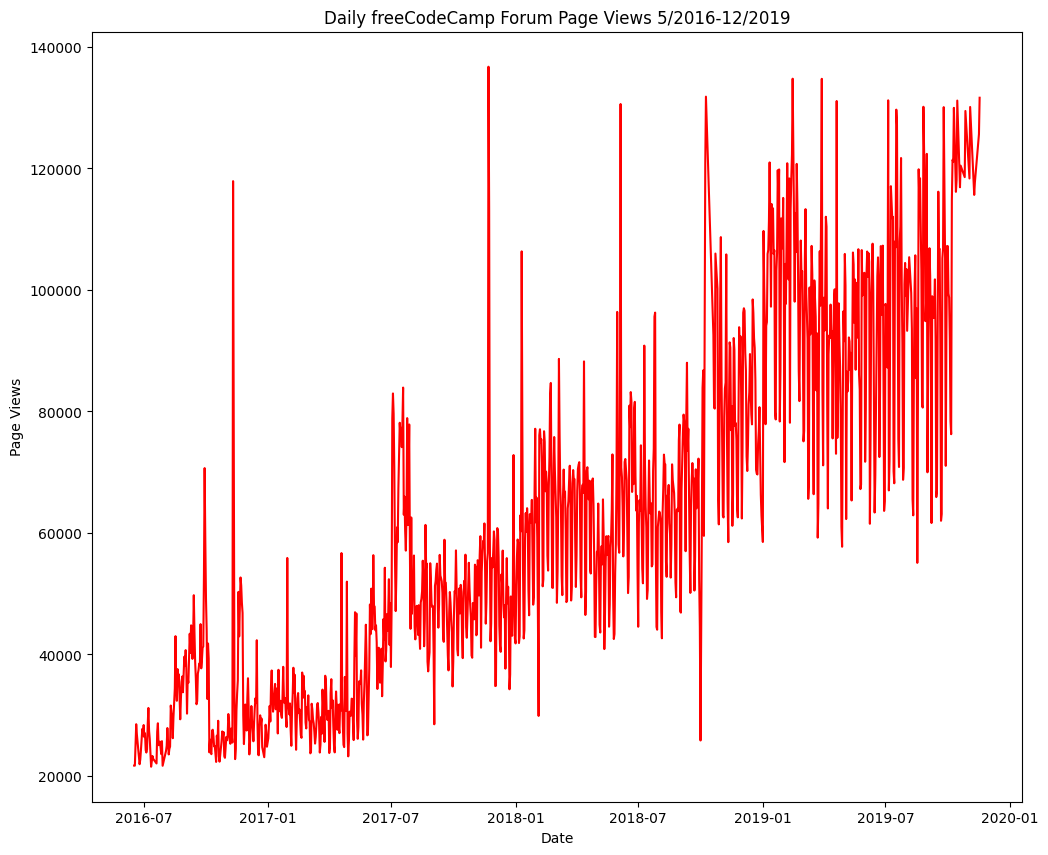

In [37]:
fig, ax=plt.subplots(figsize=(12,10))
fig=plt.plot(df, color='r')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


fig

In [59]:
 # Copy and modify data for monthly bar plot. It should show average daily page views for each month grouped by year.
df_bar=df.copy()
df_bar['month']= df.index.month
df_bar['year']= df.index.year

df_bar = df_bar.groupby(["year", "month"])['value'].mean().unstack()


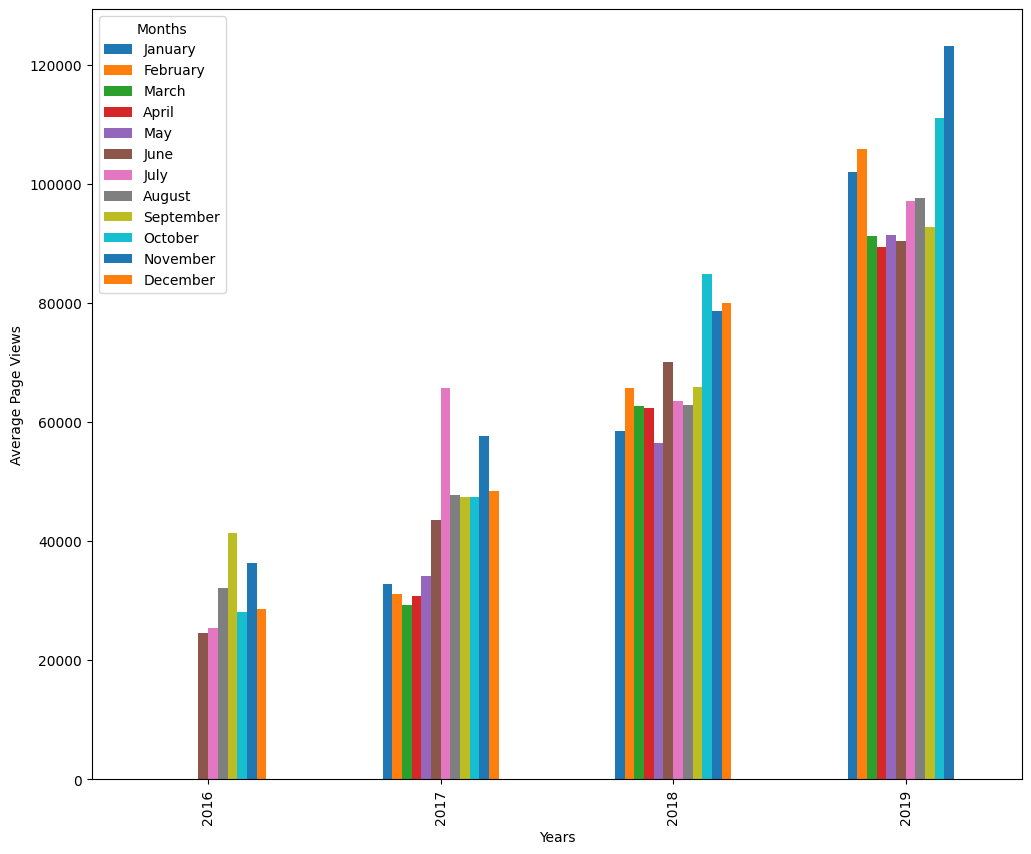

In [69]:



fig=df_bar.plot.bar(xlabel='Years', ylabel='Average Page Views', figsize=(12,10))
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')




In [90]:
 # Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

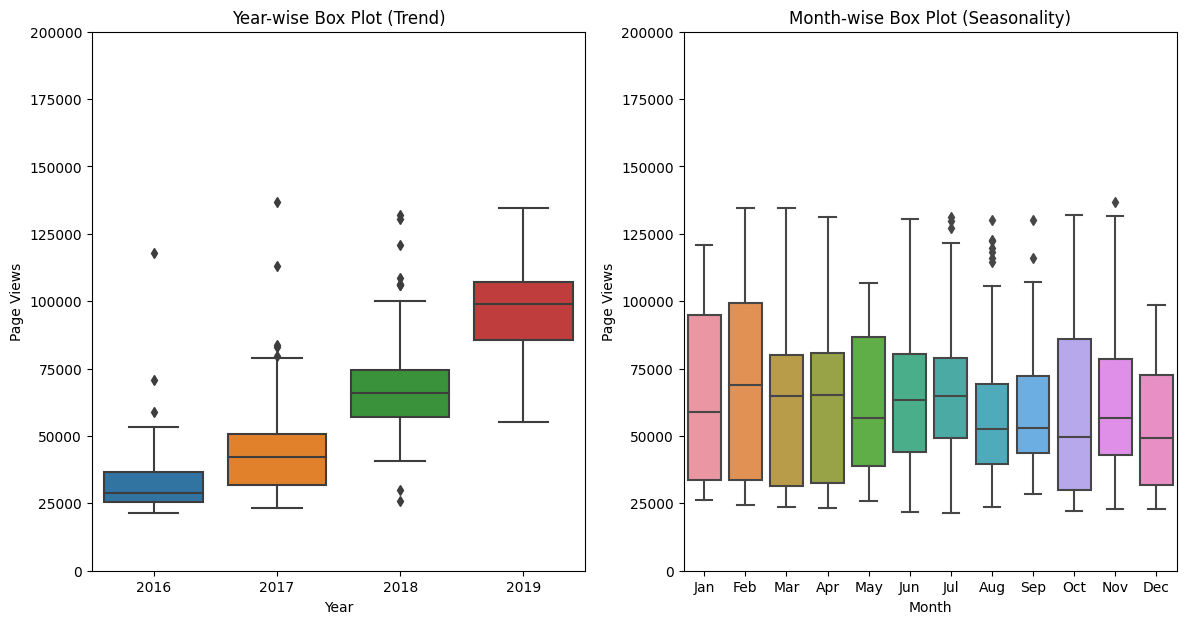

In [101]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(14,7))

ax0=sns.boxplot(x='year', y='value', ax=ax[0], data=df_box)
ax0.set_ylim(0, 200000)
ax0.set_xlabel('Year')
ax0.set_ylabel('Page Views')
ax0.set_title('Year-wise Box Plot (Trend)')

ax1=sns.boxplot(x='month', y='value',order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax=ax[1], data=df_box)
ax1.set_ylim(0, 200000)
ax1.set_xlabel('Month')
ax1.set_ylabel('Page Views')
ax1.set_title('Month-wise Box Plot (Seasonality)')